<a href="https://colab.research.google.com/github/kalizhaankyzy/kaz_data_analysis/blob/main/kz_population_by_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("nurasssyl/kazakhstan-population-by-gender-and-locality-2024")
print("Path to dataset files:", path)

100%|██████████| 31.0k/31.0k [00:00<00:00, 33.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nurasssyl/kazakhstan-population-by-gender-and-locality-2024/versions/2


In [2]:
import os
import pandas as pd
files = os.listdir(path)
print("Files in the dataset directory:", files)

csv_file = os.path.join(path, files[1])
df = pd.read_csv(csv_file)
df

Files in the dataset directory: ['Population of the Republic of Kazakhstan by gender and type of locality (as of July 1 2024).xlsx', 'Population of the Republic of Kazakhstan by gender and type of locality (as of July 1 2024).csv']


,Districts (adm2 level),Total population,men,women,urban_population,urban_population_men,urban_population_women,rural_population,rural_population_men,rural_population_women
0,Semei с.а.,"311,694","149,017","162,677","311,604","148,967","162,637",90,50,40
1,Кurchatov с.а.,"10,217","4,987","5,230","10,217","4,987","5,230",-,-,-
2,Abai district,"13,756","6,906","6,850",-,-,-,"13,756","6,906","6,850"
3,Aksuat district,"19,128","9,826","9,302",-,-,-,"19,128","9,826","9,302"
4,Ayagoz distict,"64,968","32,699","32,269","41,820","20,717","21,103","23,148","11,982","11,166"
...,...,...,...,...,...,...,...,...,...,...
222,Abay district,"230,468","111,427","119,041","230,468","111,427","119,041",-,-,-
223,Al-Farabi district,"268,684","127,103","141,581","268,684","127,103","141,581",-,-,-
224,Enbekshi district,"205,214","98,507","106,707","205,214","98,507","106,707",-,-,-
225,Karatau district,"301,428","148,686","152,742","301,428","148,686","152,742",-,-,-


In [3]:
df.replace("-", pd.NA, inplace=True)
df.rename(columns={
    "Districts (adm2 level)": "district",
    "Total population": "total_population",
    "urban_population_men": "urban_men",
    "urban_population_women": "urban_women",
    "rural_population_men": "rural_men",
    "rural_population_women": "rural_women"
}, inplace=True)

# Verify the changes
print(df.head())

          district total_population      men    women urban_population  \
0       Semei с.а.          311,694  149,017  162,677          311,604   
1   Кurchatov с.а.           10,217    4,987    5,230           10,217   
2    Abai district           13,756    6,906    6,850             <NA>   
3  Aksuat district           19,128    9,826    9,302             <NA>   
4   Ayagoz distict           64,968   32,699   32,269           41,820   

  urban_men urban_women rural_population rural_men rural_women  
0   148,967     162,637               90        50          40  
1     4,987       5,230             <NA>      <NA>        <NA>  
2      <NA>        <NA>           13,756     6,906       6,850  
3      <NA>        <NA>           19,128     9,826       9,302  
4    20,717      21,103           23,148    11,982      11,166  


In [4]:
## Data type transformation
# List of columns to convert
columns_to_convert = [
    "total_population", "men", "women", "urban_population", "urban_men",
    "urban_women", "rural_population", "rural_men", "rural_women"
]

# Convert each column to integer (nullable Int64 type)
for column in columns_to_convert:
    if column in df.columns:  # Check if the column exists
        df[column] = df[column].str.replace(",", "")
        df[column] = df[column].astype("Int64")

# Verify the changes
print(df.head())

          district  total_population     men   women  urban_population  \
0       Semei с.а.            311694  149017  162677            311604   
1   Кurchatov с.а.             10217    4987    5230             10217   
2    Abai district             13756    6906    6850              <NA>   
3  Aksuat district             19128    9826    9302              <NA>   
4   Ayagoz distict             64968   32699   32269             41820   

   urban_men  urban_women  rural_population  rural_men  rural_women  
0     148967       162637                90         50           40  
1       4987         5230              <NA>       <NA>         <NA>  
2       <NA>         <NA>             13756       6906         6850  
3       <NA>         <NA>             19128       9826         9302  
4      20717        21103             23148      11982        11166  


In [5]:
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 district              0
total_population      0
men                   0
women                 0
urban_population    124
urban_men           124
urban_women         124
rural_population     34
rural_men            34
rural_women          34
dtype: int64


In [6]:
df.loc[
    (df["rural_men"] + df["rural_women"] == df["total_population"]),
    ["urban_population", "urban_men", "urban_women"]
] = 0
df.loc[
    (df["urban_men"] + df["urban_women"] == df["total_population"]),
    ["rural_population", "rural_men", "rural_women"]
] = 0
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 district            0
total_population    0
men                 0
women               0
urban_population    0
urban_men           0
urban_women         0
rural_population    0
rural_men           0
rural_women         0
dtype: int64


In [7]:
df.head()

,district,total_population,men,women,urban_population,urban_men,urban_women,rural_population,rural_men,rural_women
0,Semei с.а.,311694,149017,162677,311604,148967,162637,90,50,40
1,Кurchatov с.а.,10217,4987,5230,10217,4987,5230,0,0,0
2,Abai district,13756,6906,6850,0,0,0,13756,6906,6850
3,Aksuat district,19128,9826,9302,0,0,0,19128,9826,9302
4,Ayagoz distict,64968,32699,32269,41820,20717,21103,23148,11982,11166


In [8]:
df['gender_ratio'] = df['men'] / df['women']
print(df[['district', 'gender_ratio']])

               district  gender_ratio
0            Semei с.а.       0.91603
1        Кurchatov с.а.      0.953537
2         Abai district      1.008175
3       Aksuat district      1.056332
4        Ayagoz distict      1.013325
..                  ...           ...
222       Abay district      0.936039
223  Al-Farabi district      0.897741
224   Enbekshi district      0.923154
225    Karatau district      0.973445
226      Turan district      0.946491

[227 rows x 2 columns]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

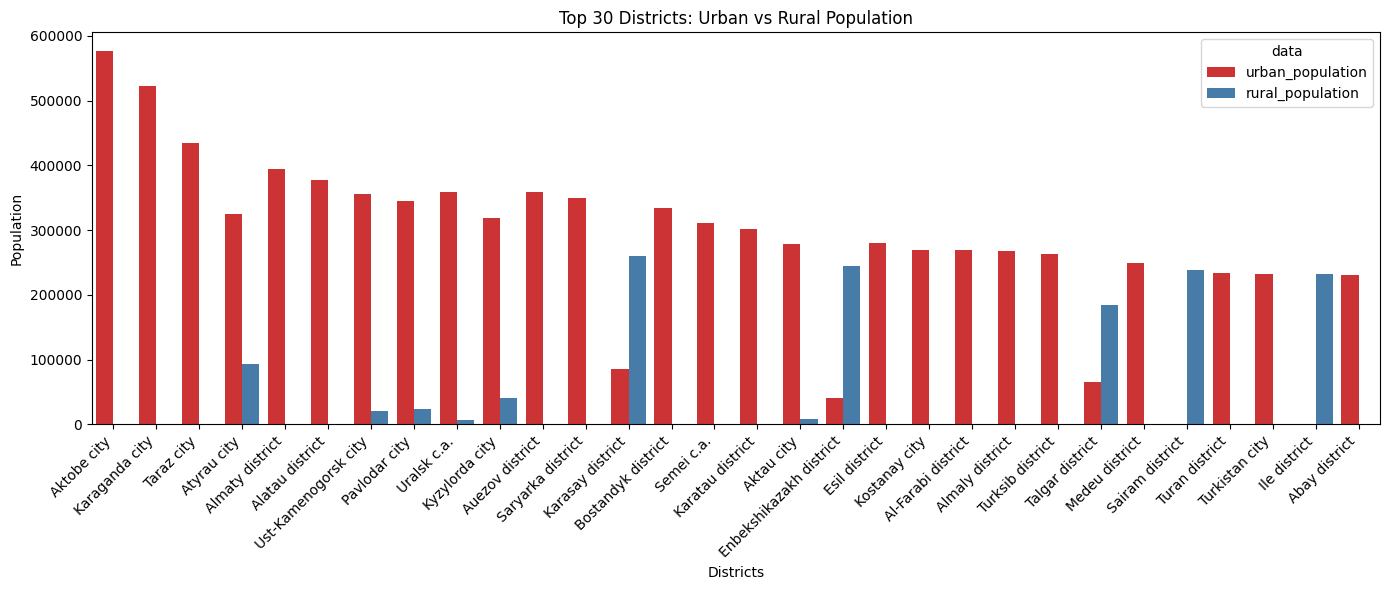

In [10]:
# Transform the dataset to a long format for easier plotting
top_districts = df.sort_values("total_population", ascending=False).head(30)

top_data = top_districts.melt(
    id_vars=["district", "total_population"],
    value_vars=["urban_population", "rural_population"],
    var_name="data",
    value_name="population"
)

# Plot gender distribution
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_data,
    x="district",
    y="population",
    hue="data",
    palette="Set1"
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Districts: Urban vs Rural Population")
plt.xlabel("Districts")
plt.ylabel("Population")
plt.tight_layout()
plt.show()

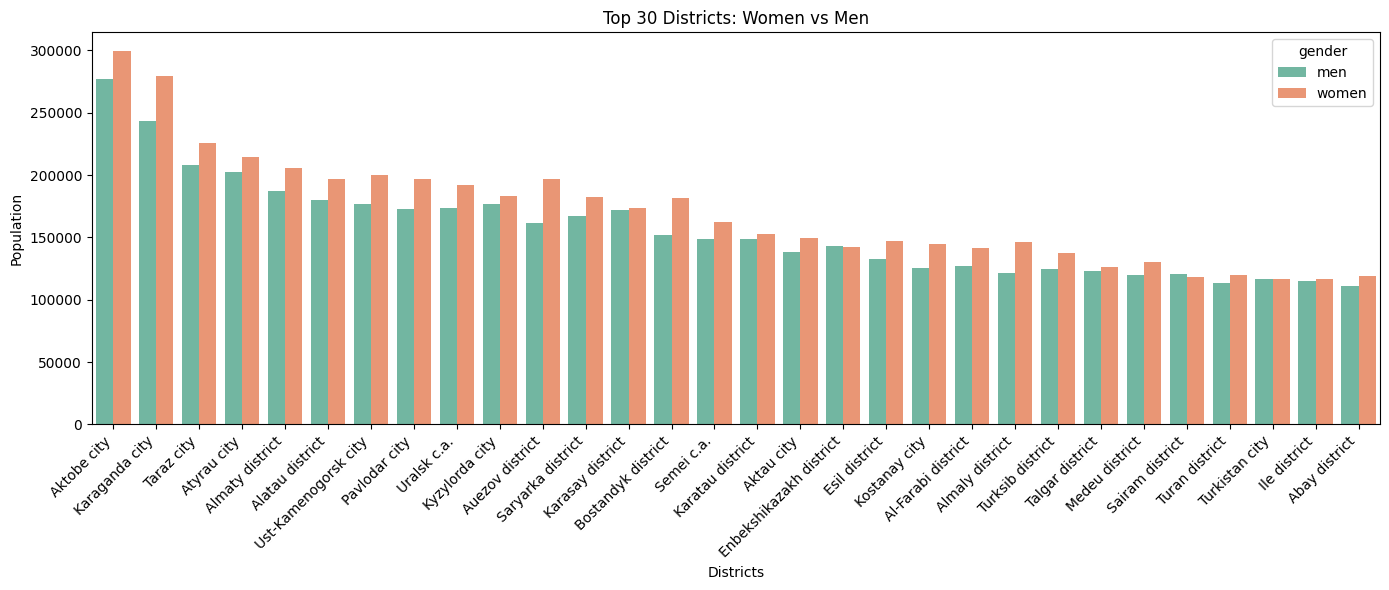

In [11]:
gender_data = top_districts.melt(
    id_vars=["district", "total_population"],
    value_vars=["men", "women"],
    var_name="gender",
    value_name="population"
)

# Plot gender distribution
plt.figure(figsize=(14, 6))
sns.barplot(
    data=gender_data,
    x="district",
    y="population",
    hue="gender",
    palette="Set2"
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Districts: Women vs Men")
plt.xlabel("Districts")
plt.ylabel("Population")
plt.tight_layout()
plt.show()


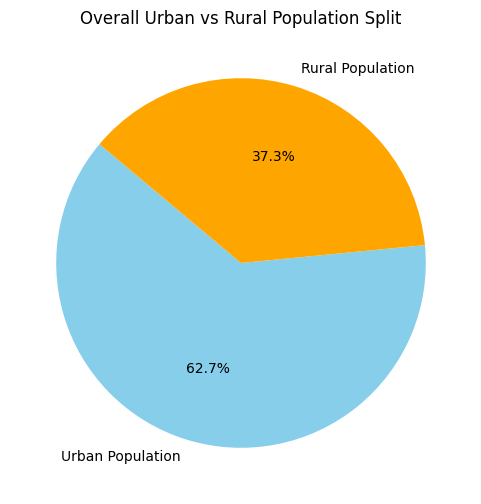

In [12]:
# Calculate total urban and rural population
total_urban = df['urban_population'].sum()
total_rural = df['rural_population'].sum()

# Data for pie chart
labels = ['Urban Population', 'Rural Population']
sizes = [total_urban, total_rural]
colors = ['skyblue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors
)
plt.title("Overall Urban vs Rural Population Split")
plt.show()


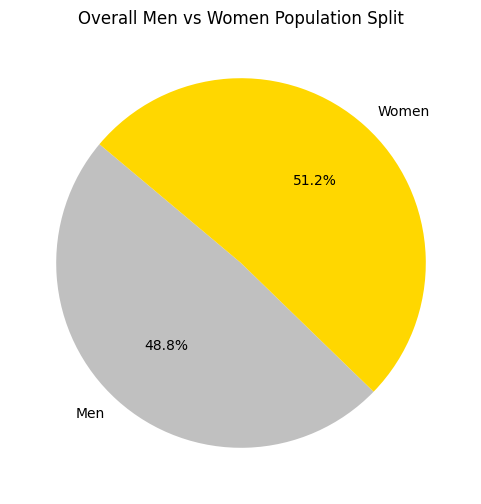

In [13]:
# Calculate total urban and rural population
total_men = df['men'].sum()
total_women = df['women'].sum()

# Data for pie chart
labels = ['Men', 'Women']
sizes = [total_men, total_women]
colors = ['silver', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors
)
plt.title("Overall Men vs Women Population Split")
plt.show()

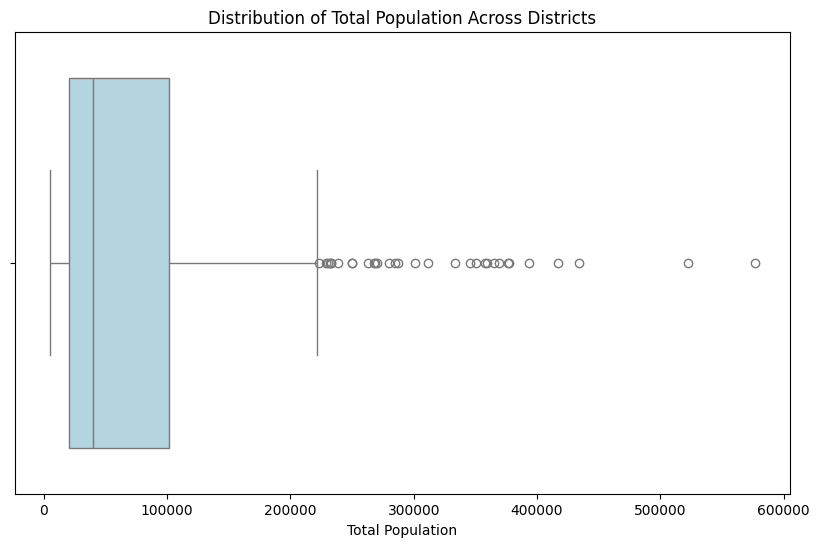

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_population'], color='lightblue')
plt.title("Distribution of Total Population Across Districts")
plt.xlabel("Total Population")
plt.show()
